##  Importing required libraries

In [90]:
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(gplots)
library(repr)

# Change plot size to 9 x 6
options(repr.plot.width=9, repr.plot.height=6)

list.files("../input")

[1] "sample_submission.csv" "test.csv"              "train.csv"

##  Importing dataset

In [272]:
train <- as.data.frame(read.csv('../input/train.csv'))
ntrain = dim(train)[1]

test <- as.data.frame(read.csv('../input/test.csv'))
ntest = dim(test)[1]

> ##  Finding dimensions of train and test datasets

In [92]:
dim(train);dim(test)

[1] 1460   81

[1] 1459   80

## Head of train dataset

In [93]:
head(train)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


## Columns in train dataset

In [94]:
names(train)

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

## Summary of train dataset

In [95]:
summary(train)

       Id           MSSubClass       MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.0   C (all):  10   Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   RH     :  16   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9   RL     :1151   Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                  Max.   :313.00  
                                                 NA's   :259     
    LotArea        Street      Alley      LotShape  LandContour  Utilities   
 Min.   :  1300   Grvl:   6   Grvl:  50   IR1:484   Bnk:  63    AllPub:1459  
 1st Qu.:  7554   Pave:1454   Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1  
 Median :  9478               NA's:1369   IR3: 10   Low:  36                 
 Mean   : 10517                           Reg:925   Lvl:1311                 
 3rd Qu.: 11602                                                              
 Max

## Identifying numeric and categorical variables

In [98]:
all_cols = names(train)

numeric_columns <- c('TotRmsAbvGrd','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','FullBath','HalfBath',
                     'BedroomAbvGr','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','MasVnrArea',
                     'X1stFlrSF' ,'X2ndFlrSF','LowQualFinSF','EnclosedPorch','X3SsnPorch','SalePrice')

numeric_columns1 <- c('TotRmsAbvGrd','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF1','SalePrice')

numeric_columns2<-c('TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BedroomAbvGr','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                      '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','MasVnrArea','SalePrice')

categorical_columns = setdiff(all_cols, c(numeric_columns,'Id'))
categorical_columns

[1] "MSSubClass"    "MSZoning"      "Street"        "Alley"        
 [5] "LotShape"      "LandContour"   "Utilities"     "LotConfig"    
 [9] "LandSlope"     "Neighborhood"  "Condition1"    "Condition2"   
[13] "BldgType"      "HouseStyle"    "OverallQual"   "OverallCond"  
[17] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[21] "MasVnrType"    "ExterQual"     "ExterCond"     "Foundation"   
[25] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[29] "BsmtFinType2"  "Heating"       "HeatingQC"     "CentralAir"   
[33] "Electrical"    "BsmtFullBath"  "BsmtHalfBath"  "KitchenAbvGr" 
[37] "KitchenQual"   "Functional"    "Fireplaces"    "FireplaceQu"  
[41] "GarageType"    "GarageFinish"  "GarageQual"    "GarageCond"   
[45] "PavedDrive"    "PoolQC"        "Fence"         "MiscFeature"  
[49] "SaleType"      "SaleCondition"

## Imputing Null values

In [99]:
for(i in all_cols){
    if (is.element(i,categorical_columns)) {
       train[,i] <-sapply(train[,i], function(x) ifelse(is.na(x), 'None', x))
       #train[,i] <-sapply(train[,i], function(x) as.factor(x))  
    } 
    else{
        train[,i] <-sapply(train[,i], function(x) ifelse(is.na(x), median(train[,i], na.rm = TRUE), x))
         } 
}
                           
for(i in names(test)){
    if (is.element(i,categorical_columns)) {
       test[,i] <-sapply(test[,i], function(x) ifelse(is.na(x), 'None', x))
       #test[,i] <-sapply(test[,i], function(x) as.factor(x))  
    } 
    else{
        test[,i] <-sapply(test[,i], function(x) ifelse(is.na(x), median(test[,i], na.rm = TRUE), x))
         } 
}


## Finding correlation between various numerical variables and the SalePrice

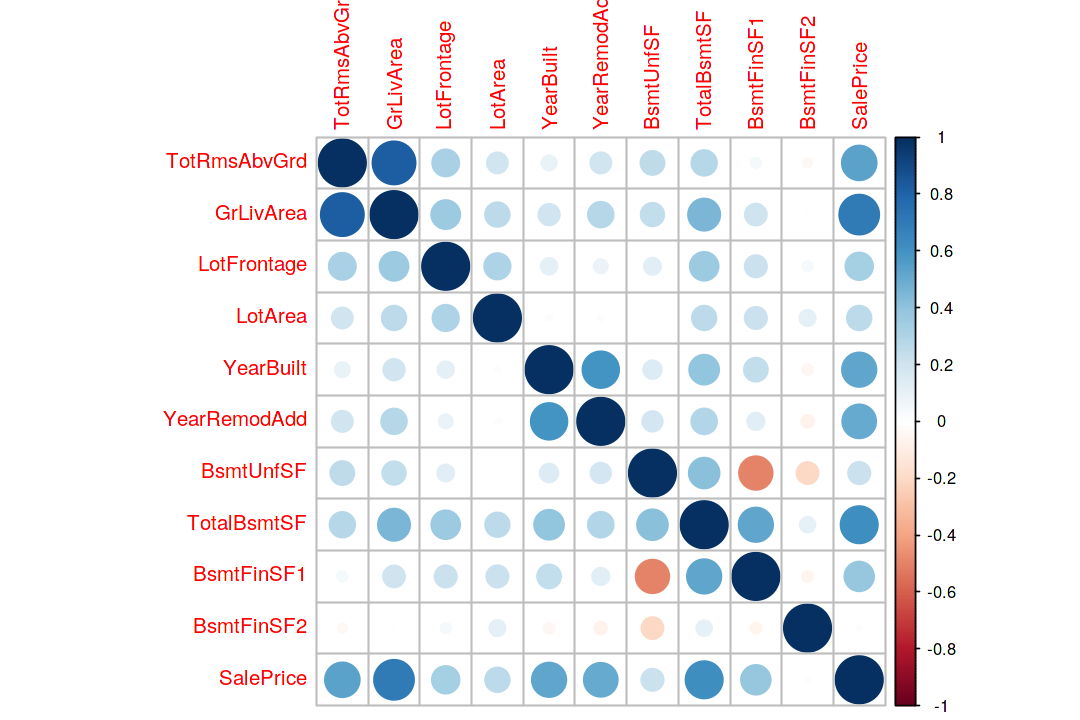

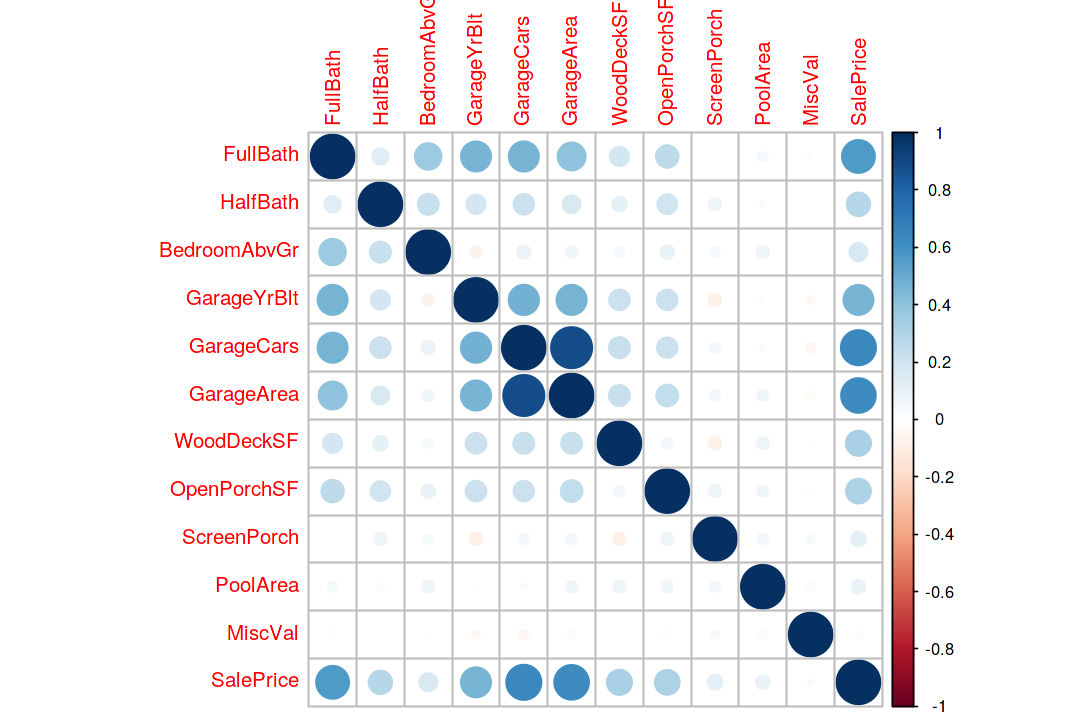

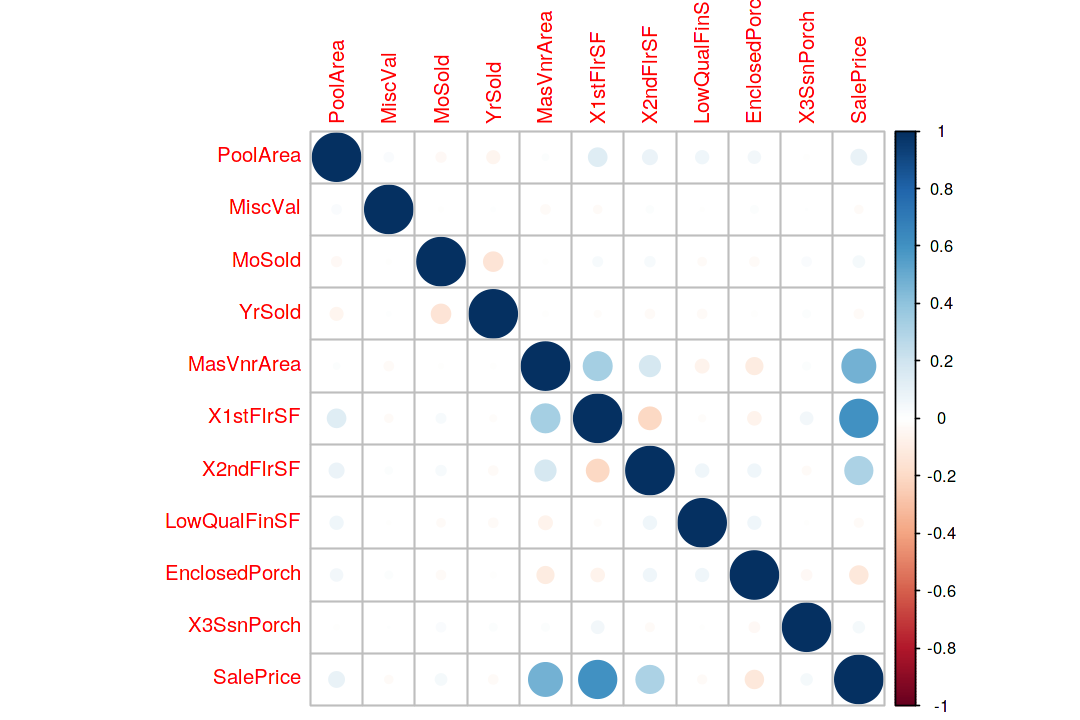

In [101]:
library(corrplot)     
l = length(numeric_columns)
corrplot(cor(train[,numeric_columns[c(1:10,l)]]));
corrplot(cor(train[,numeric_columns[c(11:21,l)]]));
corrplot(cor(train[,numeric_columns[c(21:l-1,l)]]))


## Box plots between categorical variables and SalePrice

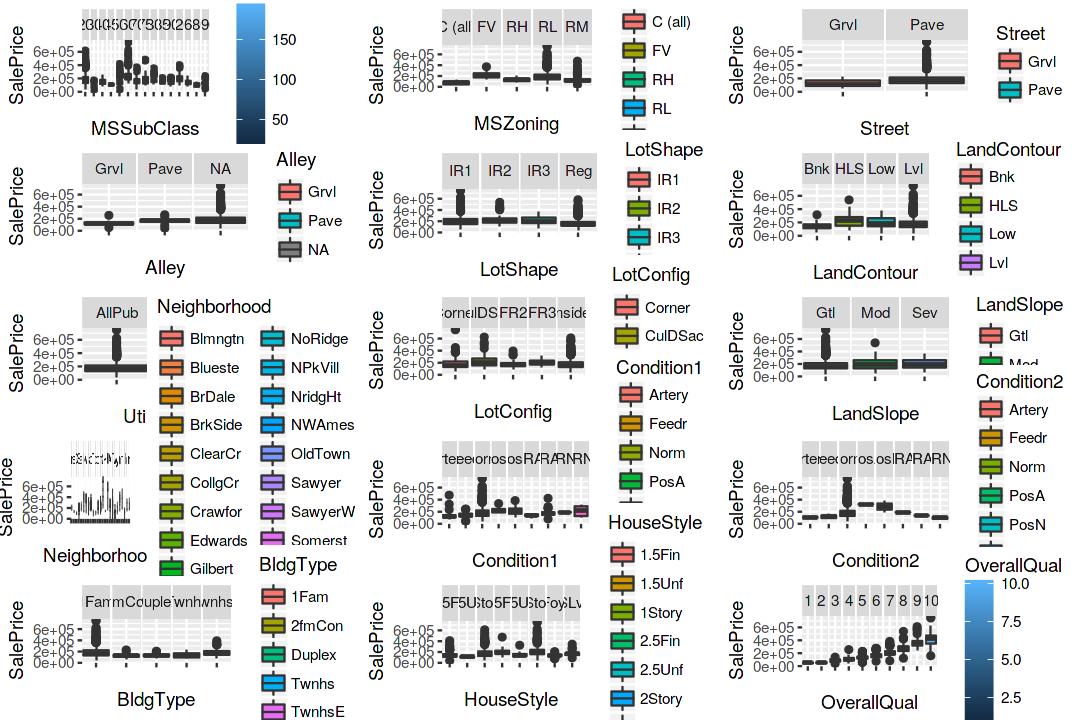

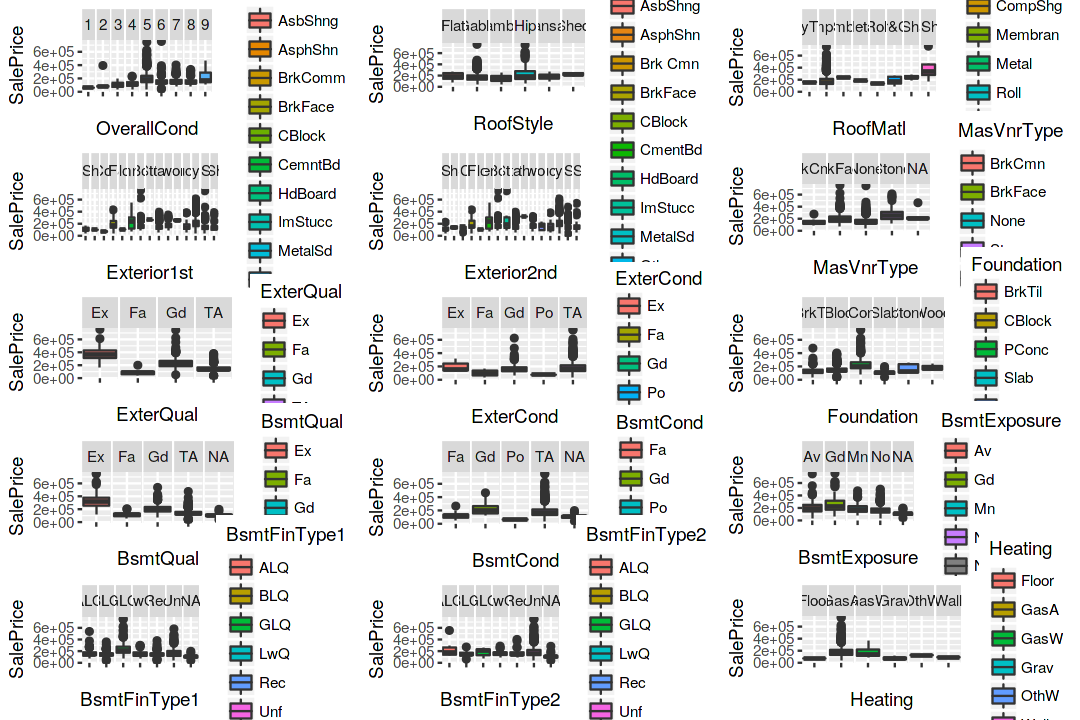

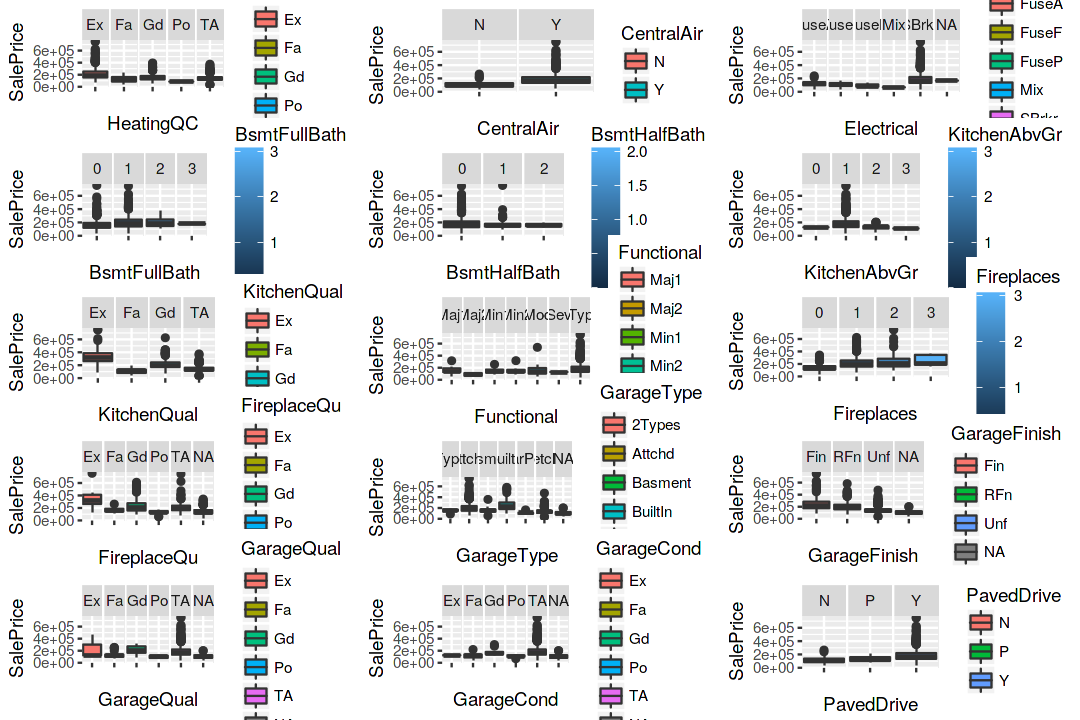

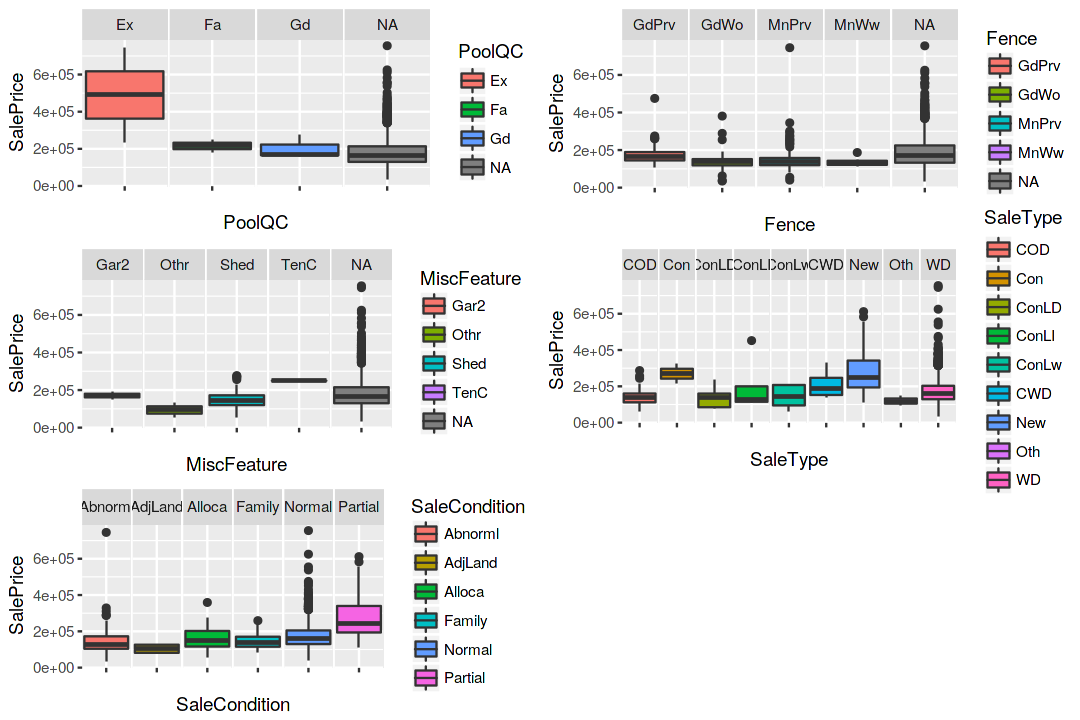

In [273]:
#Now lets consider correlation of 'SalePrice' with categorical variables
#Consider 'YearBuilt', 'LandContour', 'BldgType', 'RoofStyle', 'Foundation', 'Heating'
library(GGally)
plots = NULL
for (i in categorical_columns){
plots[[i]] = ggally_box(train, aes_string(i,"SalePrice", color = i))
    }

library(grid)
library(gridExtra)
#grid.arrange(plots, ncol = 2)

i=0
grid.arrange(plots[[i+1]],plots[[i+2]],plots[[i+3]],plots[[i+4]],plots[[i+5]],plots[[i+6]],
             plots[[i+7]],plots[[i+8]],plots[[i+9]],plots[[i+10]],plots[[i+11]],plots[[i+12]],
             plots[[i+13]],plots[[i+14]],plots[[i+15]],ncol=3)
i=15
grid.arrange(plots[[i+1]],plots[[i+2]],plots[[i+3]],plots[[i+4]],plots[[i+5]],plots[[i+6]],
             plots[[i+7]],plots[[i+8]],plots[[i+9]],plots[[i+10]],plots[[i+11]],plots[[i+12]],
             plots[[i+13]],plots[[i+14]],plots[[i+15]],ncol=3)

i=30
grid.arrange(plots[[i+1]],plots[[i+2]],plots[[i+3]],plots[[i+4]],plots[[i+5]],plots[[i+6]],
             plots[[i+7]],plots[[i+8]],plots[[i+9]],plots[[i+10]],plots[[i+11]],plots[[i+12]],
             plots[[i+13]],plots[[i+14]],plots[[i+15]],ncol=3)
i=45
grid.arrange(plots[[i+1]],plots[[i+2]],plots[[i+3]],plots[[i+4]],plots[[i+5]],ncol = 2)

## Plotting the histogram for dependent variable 'SalePrice'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


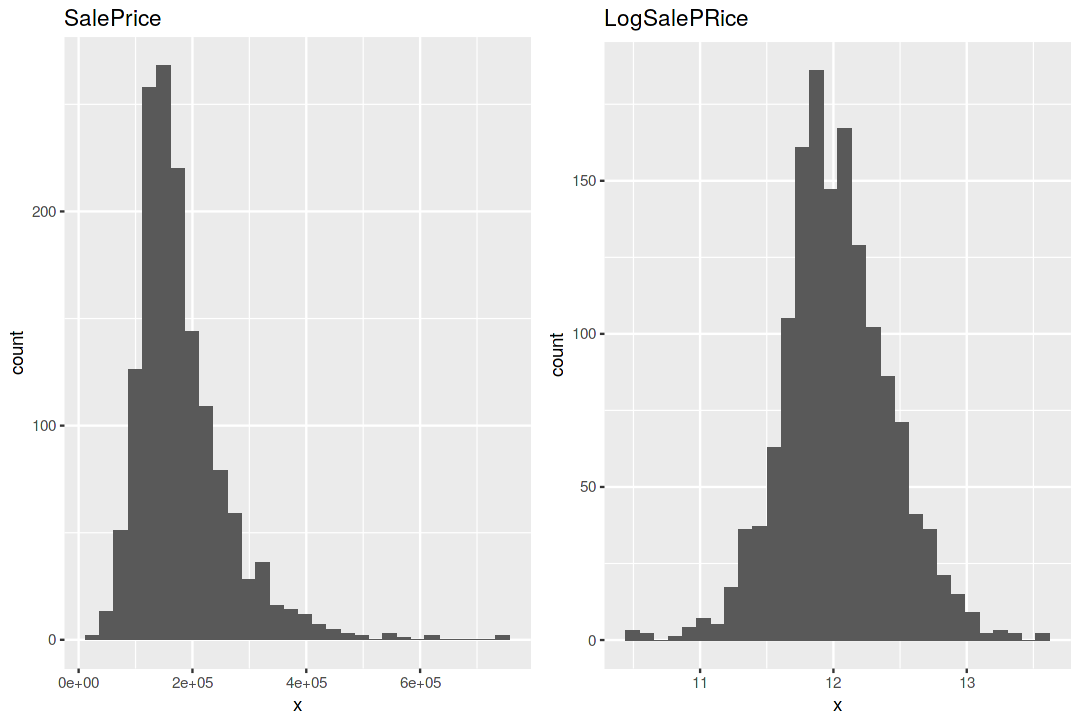

In [104]:

data1 = data.frame(train$SalePrice)
names(data1)[1] <- "SalePrice"
data1['LogSalePRice'] = log(train$SalePrice)

out<-list()

for (c in names(data1)){
    x = data1[,c]
   out[[c]] <- ggplot(data.frame(x), aes(x)) + geom_histogram() + ggtitle(c)
}

i=0
grid.arrange(out[[i+1]],out[[i+2]],ncol=2)

## Quintile quintile plots for SalePrice

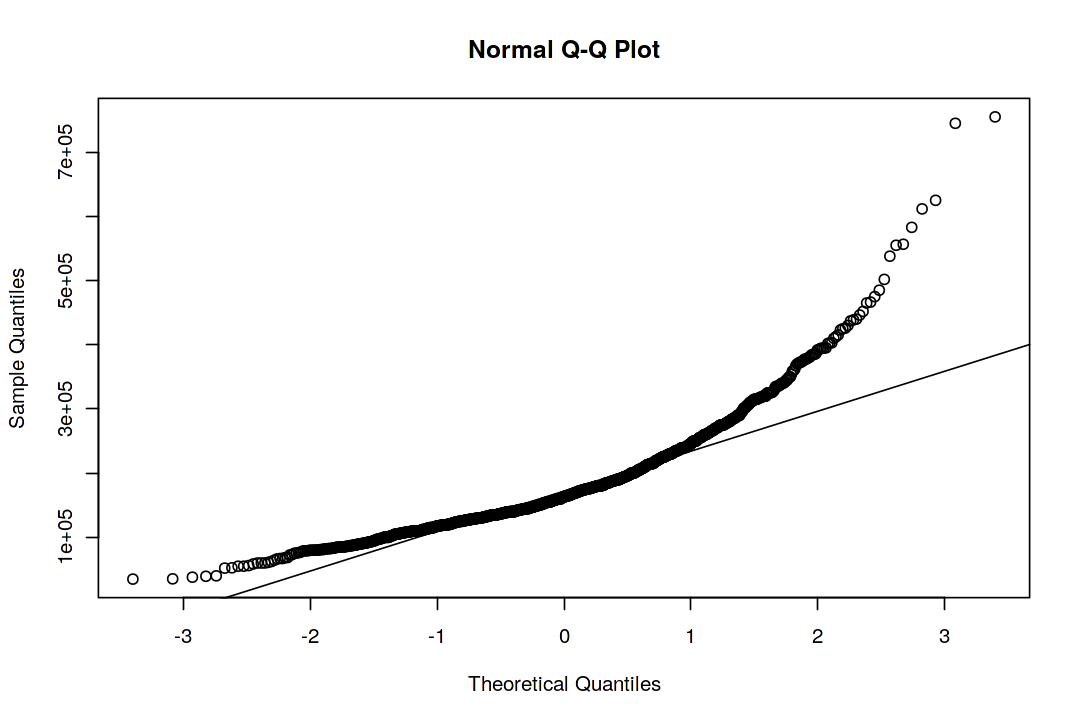

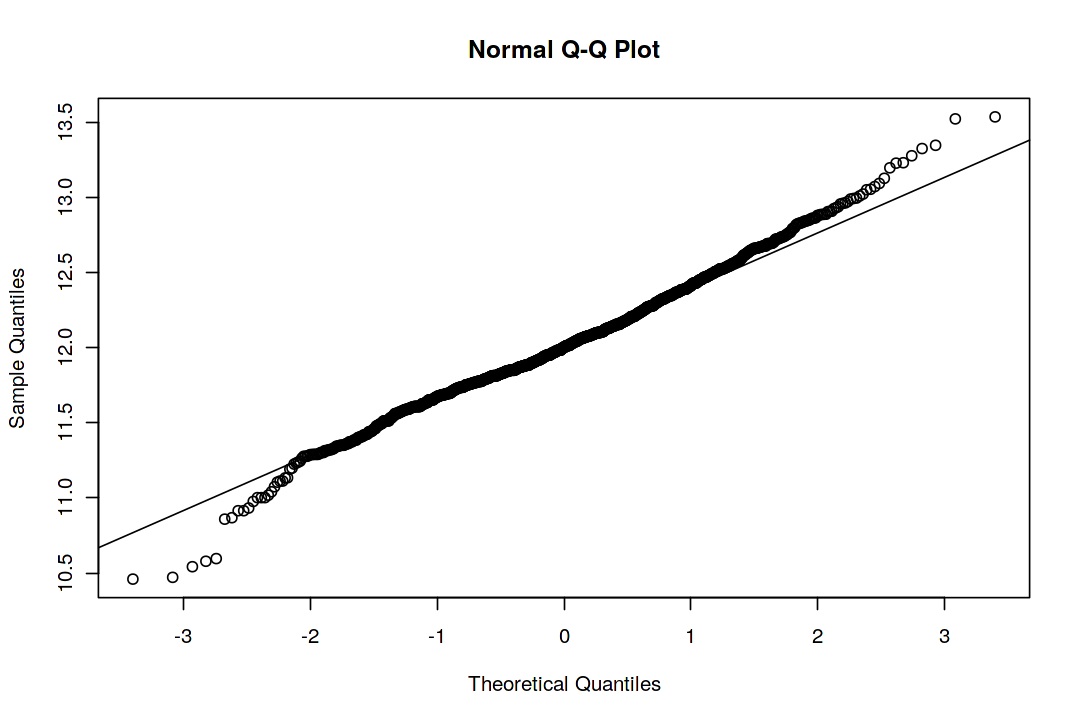

In [105]:
qqnorm(train$SalePrice);qqline(train$SalePrice);qqnorm(log(train$SalePrice));qqline(log(train$SalePrice))

## Plotting histograms for all the numerical columns

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

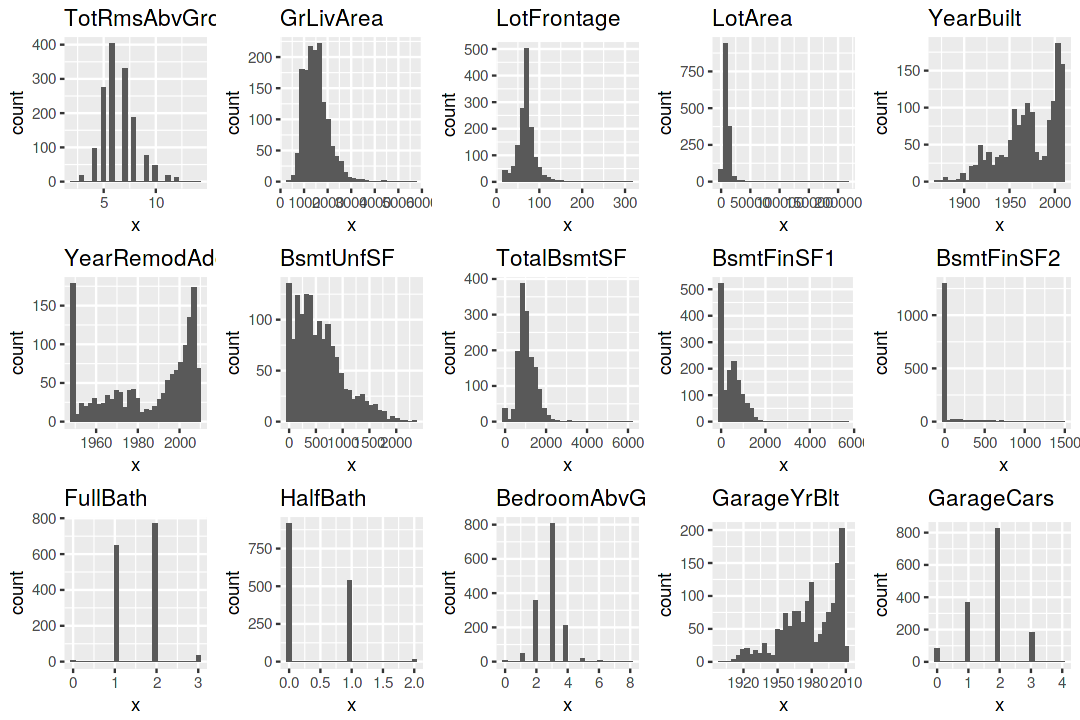

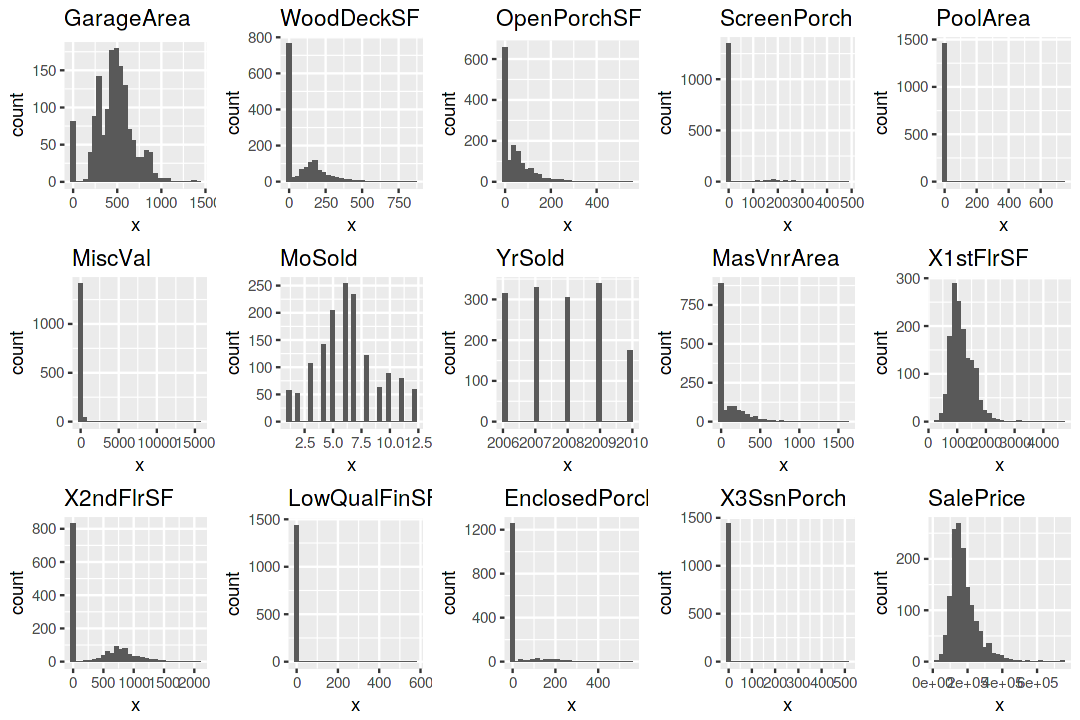

In [106]:
out<-list()

for (c in numeric_columns){
    x = train[,c]
   out[[c]] <- ggplot(data.frame(x), aes(x)) + geom_histogram() + ggtitle(c)
}
i=0
grid.arrange(out[[i+1]],out[[i+2]],out[[i+3]],out[[i+4]],out[[i+5]],out[[i+6]],
             out[[i+7]],out[[i+8]],out[[i+9]],out[[i+10]],out[[i+11]],out[[i+12]],
             out[[i+13]],out[[i+14]],out[[i+15]],ncol=5)
i=15
grid.arrange(out[[i+1]],out[[i+2]],out[[i+3]],out[[i+4]],out[[i+5]],out[[i+6]],
             out[[i+7]],out[[i+8]],out[[i+9]],out[[i+10]],out[[i+11]],out[[i+12]],
             out[[i+13]],out[[i+14]],out[[i+15]],ncol=5)

## Some feature engineering

In [109]:
#Create a combined dataset 
ntrain= dim(train)[1]
ntest= dim(test)[1]
#train_original = data.frame(train)
all_data = rbind(train[,c(1:80)],test)

#Adding one new feature:
for(i in all_cols){
    if (is.element(i,categorical_columns)) {
       all_data[,i] <-sapply(all_data[,i], function(x) as.factor(x)) 
    } 
                             }
                             
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['X1stFlrSF'] + all_data['X2ndFlrSF']

## Splitting the original training dataset into training and testing sets.

In [232]:
ntrain_set = 1100
nvali_set = 360

train_x <- all_data[1:ntrain_set,][-1]
train_y <- log(train[1:ntrain_set,'SalePrice'])
test_x <- all_data[(ntrain_set+1):dim(train)[1],][-1]
test_y <-log(train[(ntrain_set+1):dim(train)[1],'SalePrice'])

## Ridge regression model

[1] 0.2317516

[1] 73309.45

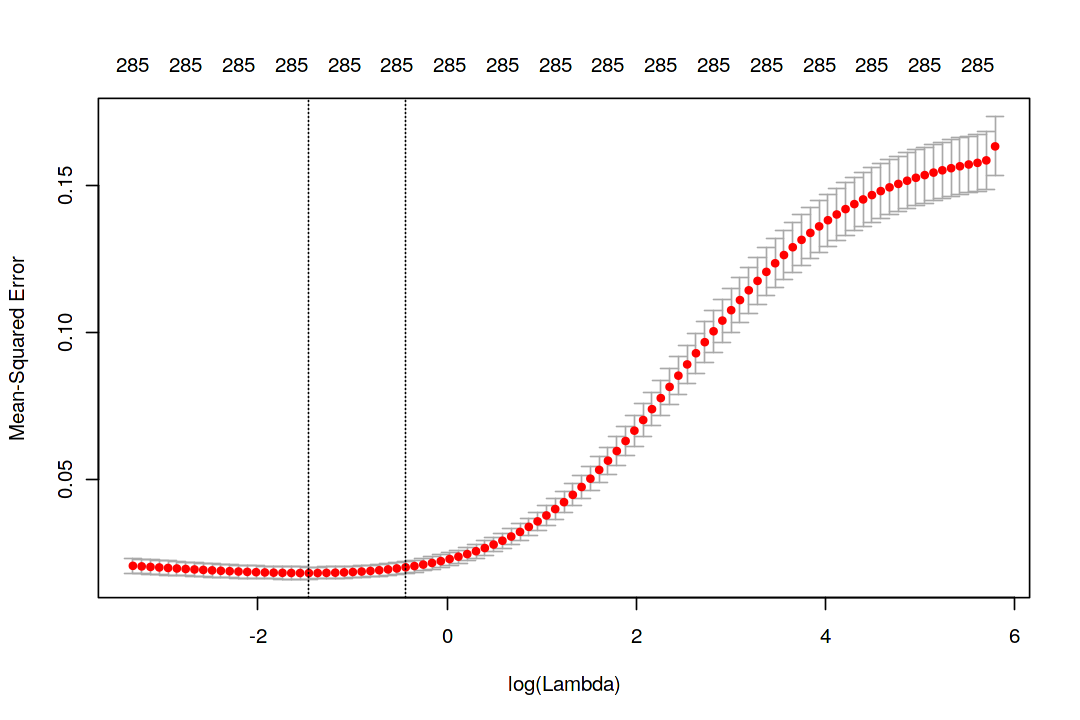

In [249]:
library(glmnet)

x_train <- model.matrix(train_y~., cbind(train_x,train_y))[,-1]
x_test<-model.matrix(~.,data=test_x)[,-1]

lambda <- c(0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75)

ridge.mod <- glmnet(x_train, train_y, alpha = 0, lambda = lambda,family="gaussian")

cv.out <- cv.glmnet(x_train, train_y, alpha = 0)

bestlam <- cv.out$lambda.min

ridge.pred <- predict(ridge.mod, s = bestlam, newx = x_test)

plot(cv.out);bestlam;(mean((exp(ridge.pred) - exp(test_y))^2))^0.5


## Lasso regression model.

[1] 0.004549378

[1] 105445.1

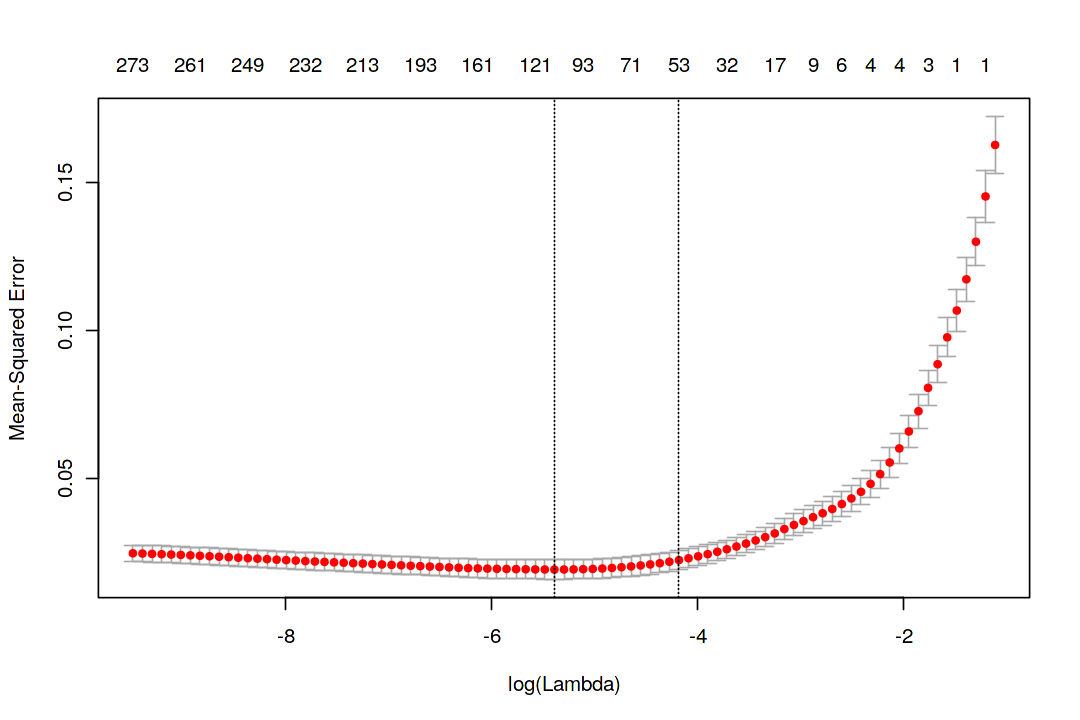

In [250]:
library(glmnet)

x_train <- model.matrix(train_y~., cbind(train_x,train_y))[,-1]
x_test<-model.matrix(~.,data=test_x)[,-1]

lambda <- c(0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75)

lasso.mod <- glmnet(x_train, train_y, alpha = 1, lambda = lambda,family="gaussian")

cv.out <- cv.glmnet(x_train, train_y, alpha = 1)

bestlam <- cv.out$lambda.min

lasso.pred <- predict(lasso.mod, s = bestlam, newx = x_test)

plot(cv.out);bestlam;(mean((exp(lasso.pred) - exp(test_y))^2))^0.5


## Simple linear regression model

In [263]:
library(glmnet)

x_train <- model.matrix(train_y~., cbind(train_x,train_y))[,-1]
x_test<-model.matrix(~.,data=test_x)[,-1]

lambda <- c(0:0)

linear.mod <- glmnet(x_train, train_y, alpha = 0, lambda = 0,family="gaussian")

cv.out <- cv.glmnet(x_train, train_y, alpha = 0)

bestlam <- cv.out$lambda.min

linear.pred <- predict(linear.mod, s = bestlam, newx = x_test)

bestlam;(mean((exp(linear.pred) - exp(test_y))^2))^0.5


[1] 0.2317516

[1] 101625.6

## Simple linear regression model using basic lm method from R

In [269]:
model = lm(train_y~.,data = cbind(train_x,train_y))
summary(model)


Call:
lm(formula = train_y ~ ., data = cbind(train_x, train_y))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69288 -0.04661  0.00138  0.04682  0.65037 

Coefficients: (13 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.745e+01  5.712e+00   3.055 0.002321 ** 
MSSubClass20      4.565e-02  4.662e-02   0.979 0.327800    
MSSubClass70      6.798e-02  3.385e-02   2.008 0.044956 *  
MSSubClass50      5.811e-02  5.195e-02   1.119 0.263637    
MSSubClass190     1.625e-01  1.537e-01   1.057 0.290874    
MSSubClass45      3.161e-02  4.872e-02   0.649 0.516668    
MSSubClass90      1.870e-02  6.809e-02   0.275 0.783639    
MSSubClass120    -2.031e-02  8.324e-02  -0.244 0.807266    
MSSubClass30     -8.726e-04  5.624e-02  -0.016 0.987624    
MSSubClass85     -1.584e-02  7.394e-02  -0.214 0.830392    
MSSubClass80     -1.060e-01  9.602e-02  -1.104 0.269916    
MSSubClass160    -1.296e-01  7.731e-02  -1.676 0.09413

## Residual plot for simple lieanr regression model

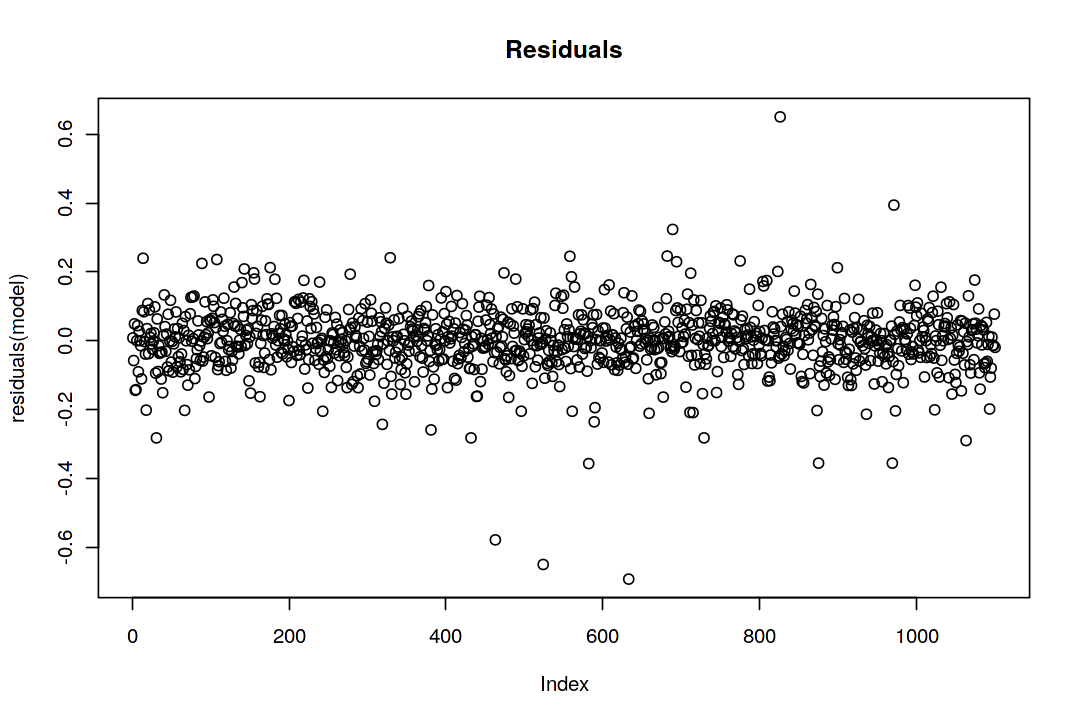

In [264]:
plot(residuals(model),main = 'Residuals')